In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import acgan.data.imagenet2012bbox

session = tf.InteractiveSession()

%pdb


Automatic pdb calling has been turned ON


In [2]:
dataset, info = tfds.load('imagenet2012bbox', with_info=True, split=tfds.Split.VALIDATION)

Shuffling and writing examples to /data/marinodl/tensorflow_datasets/imagenet2012bbox/5.0.0.incomplete1ALIUG/imagenet2012bbox-train.tfrecord


Shuffling and writing examples to /data/marinodl/tensorflow_datasets/imagenet2012bbox/5.0.0.incomplete1ALIUG/imagenet2012bbox-validation.tfrecord


Dataset imagenet2012bbox downloaded and prepared to /data/marinodl/tensorflow_datasets/imagenet2012bbox/5.0.0. Subsequent calls will reuse this data.


In [3]:
info

tfds.core.DatasetInfo(
    name='imagenet2012bbox',
    version=5.0.0,
    description='ILSVRC 2012, aka ImageNet is an image dataset organized according to the
WordNet hierarchy. Each meaningful concept in WordNet, possibly described by
multiple words or word phrases, is called a "synonym set" or "synset". There are
more than 100,000 synsets in WordNet, majority of them are nouns (80,000+). In
ImageNet, we aim to provide on average 1000 images to illustrate each synset.
Images of each concept are quality-controlled and human-annotated. In its
completion, we hope ImageNet will offer tens of millions of cleanly sorted
images for most of the concepts in the WordNet hierarchy.
Note that labels were never publicly released for the test set, so we only
include splits for the training and validation sets here.',
    homepage='http://image-net.org/',
    features=FeaturesDict({
        'file_name': Text(shape=(), dtype=tf.string),
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),

In [4]:
import tensorflow as tf
data_gen = tf.compat.v1.data.make_one_shot_iterator(dataset).get_next()

b'ILSVRC2012_val_00004634.JPEG'
251
{'bbox': {'xmax': array([457], dtype=int32), 'xmin': array([50], dtype=int32), 'ymax': array([244], dtype=int32), 'ymin': array([55], dtype=int32)}, 'label': array([b'n02110341'], dtype=object)}


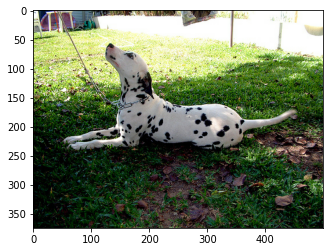

In [255]:
import matplotlib.pyplot as plt

data = session.run(data_gen)
plt.imshow(data['image'])
print(data['file_name'])
print(data['label'])
print(data['objects'])

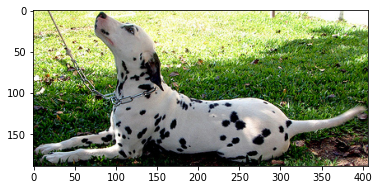

In [256]:
n_imgs = len(data['objects']['label'])
fig, ax = plt.subplots(n_imgs, squeeze=False)
ax = ax.flatten()
for idx in range(n_imgs):
    ax[idx].imshow(
    data['image'][
        int(data['objects']['bbox']['ymin'][idx]):int(data['objects']['bbox']['ymax'][idx]), 
        int(data['objects']['bbox']['xmin'][idx]):int(data['objects']['bbox']['xmax'][idx])
    ]
)